<a href="https://colab.research.google.com/github/cdss8/AI-ML/blob/main/JM_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Juan Manuel Sialo
#Laboratory 5

In [198]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [199]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import time

In [200]:
data= pd.read_csv('/content/gdrive/MyDrive/AI-ML/covtype.data', sep=',', header=None)

columns=['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
         'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
         'Horizontal_Distance_To_Fire_Points'] + [f'Wilderness_Area{i}' for i in range(1,5)] + [f'Soil_Type{i}' for i in range(1,41)] + ['Cover_Type']

data = data.rename(lambda a: columns[a], axis=1)

In [201]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [202]:
#НNormalizing numerical atributes using StandartScaler
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
dataNumeric = ss.fit_transform(data[data.columns[:10]])

In [203]:
data.update(pd.DataFrame(dataNumeric, columns=data.columns[:10]))
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,-3.819486e-16,-3.913408e-17,6.417988e-17,-7.122402e-17,8.061620e-17,2.191508e-17,5.060036e-16,3.025064e-16,-1.385346e-16,1.565363e-17,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,-3.930094e+00,-1.390866e+00,-1.883448e+00,-1.267604e+00,-3.763928e+00,-1.507225e+00,-7.924808e+00,-1.129659e+01,-3.723844e+00,-1.495469e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-5.370487e-01,-8.726087e-01,-6.815629e-01,-7.594865e-01,-6.761941e-01,-7.979117e-01,-5.284318e-01,-5.219730e-01,-6.147243e-01,-7.221685e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.308455e-01,-2.560618e-01,-1.473917e-01,-2.419591e-01,-2.816503e-01,-2.264844e-01,2.186769e-01,1.356329e-01,1.232511e-02,-2.041175e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.273071e-01,9.323547e-01,5.203224e-01,5.390366e-01,3.873587e-01,6.271292e-01,7.042976e-01,6.920686e-01,6.655016e-01,4.302306e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3.209587e+00,1.825901e+00,6.930377e+00,5.304993e+00,9.513327e+00,3.057138e+00,1.563473e+00,1.552015e+00,2.912429e+00,3.921411e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [204]:
X = data.drop(['Cover_Type'], axis=1)
Y = data['Cover_Type']
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,...,0,0,0,0,0,0,0,0,0,0
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,...,0,0,0,0,0,0,0,0,0,0
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,...,0,0,0,0,0,0,0,0,0,0
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,...,0,0,0,0,0,0,0,0,0,0
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,...,0,0,0,0,0,0,0,0,0,0


In [205]:
#converting the vector Y to a matrix of binary class

from keras.utils import to_categorical
Y -= 1
Y = to_categorical(Y)
Y[:5]

array([[0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [206]:
from keras.models import Sequential
from keras.layers import Dense

multi_classifier = Sequential()
multi_classifier.add(Dense(128,activation='relu', input_dim=X.shape[1]))
multi_classifier.add(Dense(7,activation='softmax'))

In [207]:
multi_classifier.compile(optimizer='adam',loss='categorical_crossentropy', metrics='accuracy')

In [208]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [209]:
T=[]

In [ ]:
t0 = time.time()
multi_classifier_history = multi_classifier.fit(X_train, y_train, batch_size=88, validation_split=0.2, epochs=100)

t1 = time.time()
T.append(t1-t0)

Epoch 1/100
4226/4226 [==============================] - 10s 2ms/step - loss: 0.2851 - accuracy: 0.8843 - val_loss: 0.2956 - val_accuracy: 0.8801
Epoch 2/100
4226/4226 [==============================] - 8s 2ms/step - loss: 0.2791 - accuracy: 0.8870 - val_loss: 0.2985 - val_accuracy: 0.8798
Epoch 3/100
4226/4226 [==============================] - 10s 2ms/step - loss: 0.2788 - accuracy: 0.8872 - val_loss: 0.2878 - val_accuracy: 0.8844
Epoch 4/100
4226/4226 [==============================] - 10s 2ms/step - loss: 0.2782 - accuracy: 0.8875 - val_loss: 0.2937 - val_accuracy: 0.8825
Epoch 5/100
4226/4226 [==============================] - 9s 2ms/step - loss: 0.2781 - accuracy: 0.8867 - val_loss: 0.2960 - val_accuracy: 0.8809
Epoch 6/100
4226/4226 [==============================] - 13s 3ms/step - loss: 0.2775 - accuracy: 0.8878 - val_loss: 0.2876 - val_accuracy: 0.8847
Epoch 7/100
4226/4226 [==============================] - 12s 3ms/step - loss: 0.2778 - accuracy: 0.8871 - val_loss: 0.2931 - v

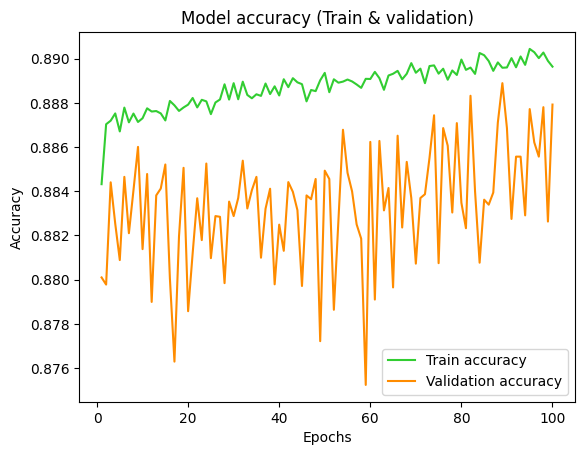

In [210]:
acc = multi_classifier_history.history['accuracy']
accValue = multi_classifier_history.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.title('Model accuracy (Train & validation)')
plt.plot(epochs, acc, color='limegreen', label = 'Train accuracy')
plt.plot(epochs, accValue, color='darkorange', label = 'Validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [211]:
y_multi = multi_classifier.predict(X_test)

3632/3632 [==============================] - 6s 1ms/step


In [162]:
print(y_test[:5])

[[0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


In [212]:
from sklearn.metrics import classification_report

y_true = np.argmax(y_test, axis=-1)
y_pred = np.argmax(y_multi, axis=-1)
print(classification_report(y_true=y_true,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.13      0.01      0.03     42275
           1       0.52      0.16      0.25     56602
           2       0.04      0.13      0.07      7269
           3       0.00      0.01      0.00       546
           4       0.01      0.25      0.02      1929
           5       0.02      0.07      0.03      3496
           6       0.04      0.06      0.05      4086

    accuracy                           0.10    116203
   macro avg       0.11      0.10      0.06    116203
weighted avg       0.31      0.10      0.14    116203



In [ ]:
##############################################################

In [227]:
df_regr = pd.read_csv('/content/gdrive/My Drive/AI-ML/day.csv')
df_regr.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [228]:
#moving from atributes

df = df_regr.drop(['instant', 'casual', 'registered', 'atemp', 'dteday'], axis=1)
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796


In [229]:
#Normalizing numeric atributes with StandartScaler library

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df_numeric = pd.DataFrame(std_scaler.fit_transform(df[df.columns[-4:]]), columns=df.columns[-4:])
df_numeric.describe()

,temp,hum,windspeed,cnt
count,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02
mean,-4.179663e-16,-9.914550e-16,-2.138432e-16,-1.166418e-16
std,1.000685e+00,1.000685e+00,1.000685e+00,1.000685e+00
min,-2.384871e+00,-4.411486e+00,-2.170506e+00,-2.315399e+00
25%,-8.653855e-01,-7.580469e-01,-7.171066e-01,-6.985684e-01
50%,1.611698e-02,-8.621154e-03,-1.228127e-01,2.254842e-02
75%,8.748452e-01,7.188453e-01,5.517254e-01,7.498640e-01
max,2.002355e+00,2.421148e+00,4.092936e+00,2.174535e+00


In [230]:
#encoding the vectors

df_categorical = df[df.columns[:-4]]
df_categorical = pd.get_dummies(df_categorical, prefix=['season', 'mnth', 'weathersit', 'weekday'], columns=['season', 'mnth', 'weathersit', 'weekday'])

In [231]:
df_regr2 = pd.concat([df_categorical, df_numeric], axis=1)
df_regr2.head()

,yr,holiday,workingday,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,temp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,-0.826662,1.250171,-0.387892,-1.817953
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,-0.721095,0.479113,0.749602,-1.912999
2,0,0,1,1,0,0,0,1,0,0,...,1,0,0,0,0,0,-1.634657,-1.339274,0.746632,-1.629925
3,0,0,1,1,0,0,0,1,0,0,...,0,1,0,0,0,0,-1.614780,-0.263182,-0.389829,-1.519898
4,0,0,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,-1.467414,-1.341494,-0.046307,-1.500269


In [232]:
X=df_regr2.drop(['cnt'], axis=1)
y = df_regr2['cnt']

In [233]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,random_state=1)

In [234]:
from keras.models import Sequential
from keras.layers import Dense
regressor = Sequential()
regressor.add(Dense(32,activation='relu',input_dim=X.shape[1]))
regressor.add(Dense(1))


In [235]:
regressor.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [242]:
from keras.callbacks import EarlyStopping

t0 = time.time()
regressor_history = regressor.fit(X_train, y_train, 
                                            batch_size=84, 
                                            validation_split=0.2,
                                            epochs=100,
                                            callbacks=[EarlyStopping(monitor='val_loss',patience=10,mode='min',verbose=1)])
t1 = time.time()
T.append(t1-t0)

Epoch 1/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0446 - mse: 0.0446 - val_loss: 0.1374 - val_mse: 0.1374
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0444 - mse: 0.0444 - val_loss: 0.1381 - val_mse: 0.1381
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0443 - mse: 0.0443 - val_loss: 0.1380 - val_mse: 0.1380
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0441 - mse: 0.0441 - val_loss: 0.1379 - val_mse: 0.1379
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0440 - mse: 0.0440 - val_loss: 0.1376 - val_mse: 0.1376
Epoch 6/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0438 - mse: 0.0438 - val_loss: 0.1370 - val_mse: 0.1370
Epoch 7/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0438 - mse: 0.0438 - val_loss: 0.1371 - val_mse: 0.1371
Epoch 8/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0436 - mse: 0.0436

In [239]:
def display_graph(history):
  mse = history.history['mse']
  val_mse = history.history['val_mse']
  epochs = range(1,len(mse)+1)

  plt.title('MSE (Train & validation error)')
  plt.plot(epochs, mse, color='blue', label = 'Train MSE')
  plt.plot(epochs, val_mse, color='orange', label = 'Validation MSE')
  plt.xlabel('Epochs')
  plt.ylabel('MSE function')
  plt.legend()
  plt.show()

In [244]:
y_regr = regressor.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [245]:
def invert_results(y):
  test_inverted = pd.concat([X_test, y], axis=1)
  test_inverted = test_inverted[test_inverted.columns[-4:]]
  res = pd.DataFrame(std_scaler.inverse_transform(test_inverted), columns=df.columns[-4:], index=test_inverted.index)
  return res['cnt']

In [246]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
y_true = invert_results(y_test)
y_pred = invert_results(pd.Series(y_regr.reshape(-1), index = X_test.index))
df_scores = pd.DataFrame({'R2-Score': round(r2_score(y_true,y_pred),3), 
                          'MSE': round(mean_squared_error(y_true,y_pred),3), 
                          'MAE': round(mean_absolute_error(y_true,y_pred),3)}, index = ['NN1'])
df_scores

,R2-Score,MSE,MAE
NN1,0.88,442768.352,479.815


In [ ]:
############################################

In [ ]:
#The Algorithm shows better performance once we include mor ephox and structure for data aproximation
#The clasificator developed with help or neural network gives good results but perfomn very very slow
#The Regressor doesn't give same results, is less exact in comparison to the results obtained in the lab 3 